# Amazon Sales Data Analysis Project

## Objective  
To analyze Amazon sales data to identify trends, key performance metrics,  
and actionable insights that can enhance business decision-making.  

The project will also include the implementation of A/B testing to evaluate  
the impact of different business strategies, such as pricing changes,  
promotional offers, and fulfillment options.  

The goal is to optimize sales performance and improve customer satisfaction.  

---

## 1. Project Overview  
- **Goal:** Gain insights to improve sales and operational efficiency.  
- **Key Focus Areas:**  
  - Trends analysis  
  - Key performance indicators (KPIs)  
  - Actionable recommendations  
  - A/B testing implementation  

---

## 2. Data Overview  
- **Dataset Description:**  
  - Source of the data  - Kaggle
  
  ### Column Descriptions:

- **Category**: Type of product. *(String)*
- **Size**: Size of the product. *(String)*
- **Date**: Date of the sale. *(Date)*
- **Status**: Status of the sale. *(String)*
- **Fulfilment**: Method of fulfilment. *(String)*
- **Style**: Style of the product. *(String)*
- **SKU**: Stock Keeping Unit. *(String)*
- **ASIN**: Amazon Standard Identification Number. *(String)*
- **Courier Status**: Status of the courier. *(String)*
- **Qty**: Quantity of the product. *(Integer)*
- **Amount**: Amount of the sale. *(Float)*
- **B2B**: Business to business sale. *(Boolean)*
- **Currency**: The currency used for the sale. *(String)*  
    
  - Known issues (e.g., missing values, duplicates)  

---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 3. Data Loading & Preprocessing  
- Load the dataset  
- Handle missing values  
- Data type corrections  
- Removing duplicates  

---

### 1. Load the dataset
 - Exploration of the dataset

In [2]:
amazon_df = pd.read_csv('F:/Amazon_Sales_Analysis/data/raw/Amazon Sale Report.csv', low_memory = False)
amazon_df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [3]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [4]:
amazon_df = amazon_df.set_index('index')
amazon_df.index.name = None
amazon_df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [5]:
amazon_df.describe()

,Qty,Amount,ship-postal-code
count,128975.000000,121180.000000,128942.000000
mean,0.904431,648.561465,463966.236509
std,0.313354,281.211687,191476.764941
min,0.000000,0.000000,110001.000000
25%,1.000000,449.000000,382421.000000
50%,1.000000,605.000000,500033.000000
75%,1.000000,788.000000,600024.000000
max,15.000000,5584.000000,989898.000000


In [6]:
amazon_df.dtypes

Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object

### step 2 . Handelling the missing values

  - Checking if any null values are present
  - Cheking the colmns for null values
  - Droping columns where necessary
  - Filling the missing values as for the requirement

In [7]:
amazon_df.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [8]:
amazon_df['fulfilled-by'].value_counts()

fulfilled-by
Easy Ship    39277
Name: count, dtype: int64

In [9]:
amazon_df['Unnamed: 22'].value_counts()

Unnamed: 22
False    79925
Name: count, dtype: int64

In [10]:
amazon_df['B2B'].value_counts()

B2B
False    128104
True        871
Name: count, dtype: int64

In [11]:
amazon_df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [12]:
#creating a copy of the data to preprocess
amazon_df_cleaned = amazon_df.copy()

In [13]:
amazon_df_cleaned.drop(columns = ["Unnamed: 22"], inplace = True)

In [14]:
pd.set_option('display.max_columns' , None)
amazon_df_cleaned.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN


- Cheking the percentage of missinng data present in each column

In [15]:
for column in amazon_df_cleaned.columns:
    
    if amazon_df_cleaned[column].isnull().sum() :
        null_percentage = amazon_df_cleaned[column].isnull().sum() / len(amazon_df_cleaned) * 100
        print(f'Percentage of null value present in "{column}" column is : {null_percentage :.2f}%')

Percentage of null value present in "Courier Status" column is : 5.33%
Percentage of null value present in "currency" column is : 6.04%
Percentage of null value present in "Amount" column is : 6.04%
Percentage of null value present in "ship-city" column is : 0.03%
Percentage of null value present in "ship-state" column is : 0.03%
Percentage of null value present in "ship-postal-code" column is : 0.03%
Percentage of null value present in "ship-country" column is : 0.03%
Percentage of null value present in "promotion-ids" column is : 38.11%
Percentage of null value present in "fulfilled-by" column is : 69.55%


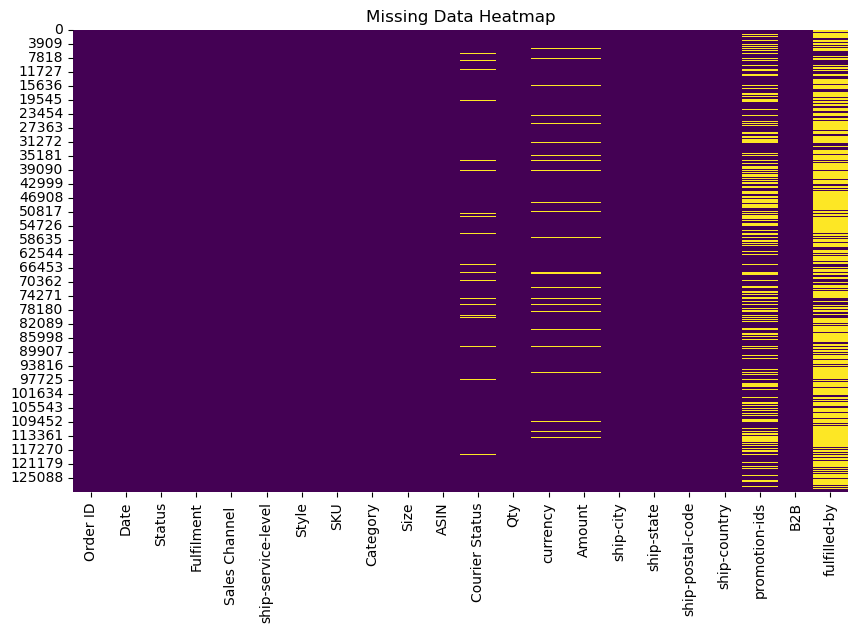

In [16]:
plt.figure(figsize=(10,6))

sns.heatmap(amazon_df_cleaned.isnull(),cbar = False, cmap = 'viridis')
plt.title('Missing Data Heatmap')
plt.show()
            

In [17]:
amazon_df_cleaned['promotion-ids'].fillna('Unknown', inplace = True)

In [18]:
amazon_df_cleaned.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,Unknown,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,Unknown,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,Unknown,False,NaN


In [19]:
if 'fulfilled-by' in amazon_df_cleaned.columns:    
    amazon_df_cleaned.drop(columns = ['fulfilled-by'],inplace = True)

In [20]:
amazon_df_cleaned.isnull().sum()

Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Style                    0
SKU                      0
Category                 0
Size                     0
ASIN                     0
Courier Status        6872
Qty                      0
currency              7795
Amount                7795
ship-city               33
ship-state              33
ship-postal-code        33
ship-country            33
promotion-ids            0
B2B                      0
dtype: int64

In [21]:
amazon_df_cleaned['currency'].unique()

array(['INR', nan], dtype=object)

In [22]:
amazon_df_cleaned['currency'].fillna('INR' , inplace = True)

In [23]:
amazon_df_cleaned['currency'].value_counts()

currency
INR    128975
Name: count, dtype: int64

In [24]:
amazon_df_cleaned['ship-state'].mode()

0    MAHARASHTRA
Name: ship-state, dtype: object

In [25]:
amazon_df_cleaned.dropna(subset=['ship-city', 'ship-state', 'ship-postal-code', 'ship-country'], inplace=True)

In [26]:
amazon_df_cleaned.isnull().sum()

Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Style                    0
SKU                      0
Category                 0
Size                     0
ASIN                     0
Courier Status        6869
Qty                      0
currency                 0
Amount                7793
ship-city                0
ship-state               0
ship-postal-code         0
ship-country             0
promotion-ids            0
B2B                      0
dtype: int64

In [27]:
amazon_df_cleaned['Courier Status'].nunique()

3

In [28]:
amazon_df_cleaned['Courier Status'].unique()

array([nan, 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [29]:
mode_value = amazon_df_cleaned['Courier Status'].mode()[0]
amazon_df_cleaned['Courier Status'].fillna(mode_value, inplace = True)

In [30]:
amazon_df_cleaned['Amount'].nunique()

1410

In [31]:
#Checking the skewness
amazon_df_cleaned['Amount'].skew()

0.8854054151913562

In [32]:
amazon_df_cleaned['Amount'].fillna(amazon_df_cleaned['Amount'].median(), inplace=True)

In [33]:
amazon_df_cleaned.isnull().any()

Order ID              False
Date                  False
Status                False
Fulfilment            False
Sales Channel         False
ship-service-level    False
Style                 False
SKU                   False
Category              False
Size                  False
ASIN                  False
Courier Status        False
Qty                   False
currency              False
Amount                False
ship-city             False
ship-state            False
ship-postal-code      False
ship-country          False
promotion-ids         False
B2B                   False
dtype: bool

### 3. Datatype Correction
   - Changing the data type of date and ship-postal-code to its appropriate datatype

In [34]:
amazon_df_cleaned['Date'] = pd.to_datetime(amazon_df_cleaned['Date'])

In [35]:
amazon_df_cleaned['ship-postal-code'].dtype

dtype('float64')

In [36]:
amazon_df_cleaned['ship-postal-code'] = amazon_df_cleaned['ship-postal-code'].astype('int').astype('str')

In [37]:
amazon_df_cleaned.dtypes

Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Style                         object
SKU                           object
Category                      object
Size                          object
ASIN                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code              object
ship-country                  object
promotion-ids                 object
B2B                             bool
dtype: object

In [38]:
amazon_df_cleaned['Category'].nunique()

9

In [39]:
amazon_df_cleaned['Category'].unique()

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

In [40]:
amazon_df_cleaned['Category'] = amazon_df_cleaned['Category'].astype('category')


In [41]:
amazon_df_cleaned.dtypes

Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Style                         object
SKU                           object
Category                    category
Size                          object
ASIN                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code              object
ship-country                  object
promotion-ids                 object
B2B                             bool
dtype: object

### 4. Duplicate value removal

In [42]:
duplicate = amazon_df_cleaned[amazon_df_cleaned.duplicated()]

In [43]:
num_duplicates = amazon_df_cleaned.duplicated().sum()
print(num_duplicates)

6


In [44]:
amazon_df_cleaned.shape

(128942, 21)

In [45]:
amazon_df_cleaned = amazon_df_cleaned.drop_duplicates()

In [46]:
amazon_df_cleaned.shape

(128936, 21)

### 5. Outlier handelling

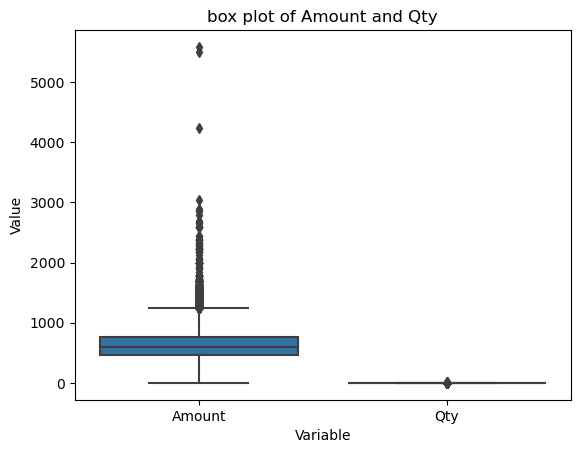

In [47]:
df_melted = amazon_df_cleaned.melt(value_vars=['Amount', 'Qty'], var_name = 'Variable', value_name = 'Value')

sns.boxplot(x = 'Variable', y = 'Value', data = df_melted)
plt.title('box plot of Amount and Qty')
plt.show()

In [48]:
print(amazon_df_cleaned['Qty'].describe())
print(f"Unique values are : {amazon_df_cleaned['Qty'].unique()}")

count    128936.000000
mean          0.904464
std           0.313316
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          15.000000
Name: Qty, dtype: float64
Unique values are : [ 0  1  2 15  3  9 13  5  4  8]


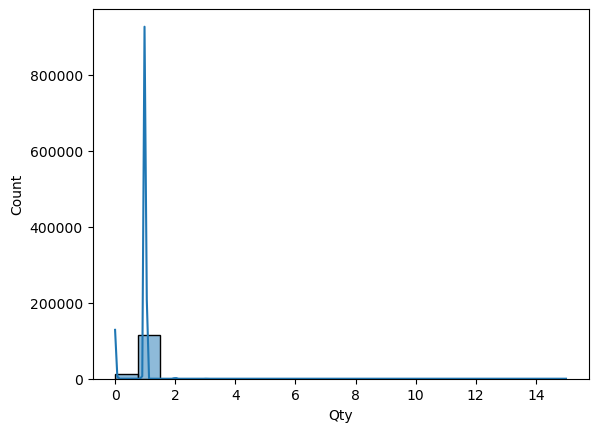

In [49]:
sns.histplot(amazon_df_cleaned['Qty'], bins = 20, kde = True)
plt.show()

In [50]:
print(amazon_df_cleaned['Qty'].value_counts().sort_index())

Qty
0      12799
1     115749
2        341
3         32
4          9
5          2
8          1
9          1
13         1
15         1
Name: count, dtype: int64


In [51]:
#Checking for IQR to detect outliers in the Qty column
Q1 = amazon_df_cleaned['Qty'].quantile(0.25)
Q3 =  amazon_df_cleaned['Qty'].quantile(0.75)

IQR = Q3 - Q1

outliers_qty = amazon_df_cleaned[(amazon_df_cleaned['Qty']  < (Q1 - 1.5 * IQR)) | (amazon_df_cleaned['Qty']  >(Q3 + 1.5 * IQR))]


In [88]:
outliers_qty

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Shipped,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,Unknown,False
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Shipped,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,Unknown,False
8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,B08L91ZZXN,Cancelled,0,INR,605.00,HYDERABAD,TELANGANA,500008,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
23,404-6019946-2909948,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET291,SET291-KR-PP-M,Set,M,B099NK55YG,Shipped,0,INR,570.48,pune,MAHARASHTRA,411044,IN,Unknown,False
29,404-5933402-8801952,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,JNE2132,JNE2132-KR-398-XXXL,kurta,3XL,B07JG3CND8,Shipped,0,INR,605.00,GUWAHATI,ASSAM,781003,IN,Unknown,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128907,403-6757403-6097100,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,NW014,NW014-ST-SR-XXXL,Set,3XL,B0928ZT74Y,Cancelled,0,INR,605.00,GREATER NOIDA,UTTAR PRADESH,201306,IN,Unknown,False
128908,403-6757403-6097100,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,NW007,NW007-ST-CP-XXXL,Set,3XL,B0928YCMQP,Cancelled,0,INR,605.00,GREATER NOIDA,UTTAR PRADESH,201306,IN,Unknown,False
128956,403-0816822-3188305,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,NW032,NW032-ST-CP-XXXL,Set,3XL,B0922RYBMF,Shipped,2,INR,992.00,CHENNAI,TAMIL NADU,600042,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128958,408-9513596-4393945,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,SET058,SET058-KR-NP-L,Set,L,B07R487XRD,Cancelled,0,INR,605.00,Bengaluru,KARNATAKA,560037,IN,Unknown,False


In [53]:
#Checking for IQR to detect outliers in amount column
Q1 = amazon_df_cleaned['Amount'].quantile(0.25)
Q3 =  amazon_df_cleaned['Amount'].quantile(0.75)

IQR = Q3 - Q1

outliers_amount = amazon_df_cleaned[(amazon_df_cleaned['Amount']  < (Q1 - 1.5 * IQR)) | (amazon_df_cleaned['Amount']  >(Q3 + 1.5 * IQR))]


In [54]:
outliers_amount

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B
80,408-4069830-3819562,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET394,SET394-KR-NP-XXXL,Set,3XL,B09TH6R8K4,Shipped,1,INR,1281.00,Kolkata,WEST BENGAL,700048,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
102,408-7698765-2294756,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET277,SET277-KR-NP-XXL,Set,XXL,B0983FZLXC,Shipped,1,INR,1338.00,AMBARNATH,MAHARASHTRA,421502,IN,Amazon PLCC Free-Financing Universal Merchant ...,False
146,171-0131752-2560336,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET355,SET355-KR-PP-M,Set,M,B09RKDPHFP,Shipped,1,INR,1399.00,BARABANKI,UTTAR PRADESH,225001,IN,Amazon PLCC Free-Financing Universal Merchant ...,False
226,407-4936046-5852304,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET355,SET355-KR-PP-XXL,Set,XXL,B09RKD8HQJ,Shipped,0,INR,1249.11,GURUGRAM,HARYANA,122001,IN,Unknown,False
243,408-2759943-9849959,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET363,SET363-KR-NP-XXL,Set,XXL,B09TH61GMF,Shipped,1,INR,1338.00,KOLKATA,WEST BENGAL,700051,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128811,404-8080630-3948329,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,PSET268,PSET268-KR-NP-5XL,Set,5XL,B09M77H766,Shipped,1,INR,1399.00,Gurgaon,HARYANA,122001,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128846,407-3299391-4191514,2022-06-01,Cancelled,Amazon,Amazon.in,Expedited,J0277,J0277-SKD-M,Set,M,B08QGL6BRP,Unshipped,1,INR,1364.00,Hyderabad,TELANGANA,500081,IN,Unknown,False
128873,405-4724097-1016369,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0079,J0079-SKD-S,Set,S,B08XNG67ZL,Shipped,1,INR,1523.00,ALLUR,ANDHRA PRADESH,524315,IN,Amazon PLCC Free-Financing Universal Merchant ...,False
128911,171-2686043-8605144,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-XL,Set,XL,B08XNJ8P3S,Shipped,1,INR,1349.00,PUNE,MAHARASHTRA,411002,IN,Unknown,False


In [55]:
# Count occurrences of each outlier in Qty
print(amazon_df_cleaned[amazon_df_cleaned['Qty'] > amazon_df_cleaned['Qty'].quantile(0.75) + 1.5 * (amazon_df_cleaned['Qty'].quantile(0.75) - amazon_df_cleaned['Qty'].quantile(0.25))]['Qty'].value_counts())

# Count occurrences of each outlier in Amount
print(amazon_df_cleaned[amazon_df_cleaned['Amount'] > amazon_df_cleaned['Amount'].quantile(0.75) + 1.5 * (amazon_df_cleaned['Amount'].quantile(0.75) - amazon_df_cleaned['Amount'].quantile(0.25))]['Amount'].value_counts())


Qty
2     341
3      32
4       9
5       2
15      1
9       1
13      1
8       1
Name: count, dtype: int64
Amount
1399.0    321
1299.0    314
1338.0    283
1523.0    278
1349.0    254
         ... 
1923.0      1
1799.0      1
1396.0      1
2397.0      1
1244.0      1
Name: count, Length: 204, dtype: int64


In [56]:
amazon_df_cleaned[(amazon_df_cleaned['Qty'] > 5)]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B
937,S02-5278980-4327051,2022-04-30,Shipped,Amazon,Non-Amazon,Standard,BL017,BL017-63BLACK,Blouse,Free,B077Z7WDXN,Unshipped,15,INR,605.0,Surat,Gujarat,394210,IN,Unknown,False
3631,S02-1006261-5356758,2022-04-28,Shipped,Amazon,Non-Amazon,Standard,JNE2305,JNE2305-KR-533-L,kurta,L,B07GRSCXCP,Unshipped,9,INR,605.0,Surat,Gujarat,394210,IN,Unknown,False
3636,S02-6828927-1180856,2022-04-28,Shipped,Amazon,Non-Amazon,Standard,JNE2305,JNE2305-KR-533-XXL,kurta,XXL,B07GRRLW2H,Unshipped,13,INR,605.0,Surat,Gujarat,394210,IN,Unknown,False
42039,402-5239558-4281957,2022-04-05,Shipped,Amazon,Amazon.in,Expedited,SET268,SET268-KR-NP-XS,Set,XS,B08XQBXFPP,Shipped,8,INR,5584.0,GUNTUR,ANDHRA PRADESH,522007,IN,Unknown,False


In [57]:
amazon_df_cleaned['promotion_flag'] = amazon_df_cleaned['promotion-ids'].apply(lambda x: 'Unknown' if x == 'Unknown' else 'Known')


In [58]:
amazon_df_cleaned.groupby('promotion_flag')[['Qty', 'Amount']].describe()


Qty                                                \
                  count      mean       std  min  25%  50%  75%   max   
promotion_flag                                                          
Known           79794.0  1.000376  0.102235  0.0  1.0  1.0  1.0   5.0   
Unknown         49142.0  0.748728  0.448783  0.0  0.0  1.0  1.0  15.0   

                 Amount                                                       \
                  count        mean         std  min    25%    50%       75%   
promotion_flag                                                                 
Known           79794.0  673.925019  274.523811  0.0  477.0  635.0  791.0000   
Unknown         49142.0  600.487349  263.699742  0.0  434.0  605.0  714.8225   

                        
                   max  
promotion_flag          
Known           5495.0  
Unknown         5584.0

Since the bulk quantity of order doesn't align with any special events or holidays , droping them would be a good decission 

In [59]:
#Keeping only reasonable quantities
amazon_df_cleaned = amazon_df_cleaned[amazon_df_cleaned['Qty'] <= 5]

In [79]:
print(round(amazon_df_cleaned[['Qty', 'Amount']].describe(),2))

             Qty     Amount
count  128932.00  128932.00
mean        0.90     645.90
std         0.31     272.45
min         0.00       0.00
25%         1.00     459.00
50%         1.00     605.00
75%         1.00     771.00
max         5.00    5495.00


In [71]:
amazon_df_cleaned['Qty'].skew()

-2.1887377669653167

In [73]:
amazon_df_cleaned['Qty'].mode()[0]

1

In [74]:
amazon_df_cleaned['Qty'].value_counts()

Qty
1    115749
0     12799
2       341
3        32
4         9
5         2
Name: count, dtype: int64

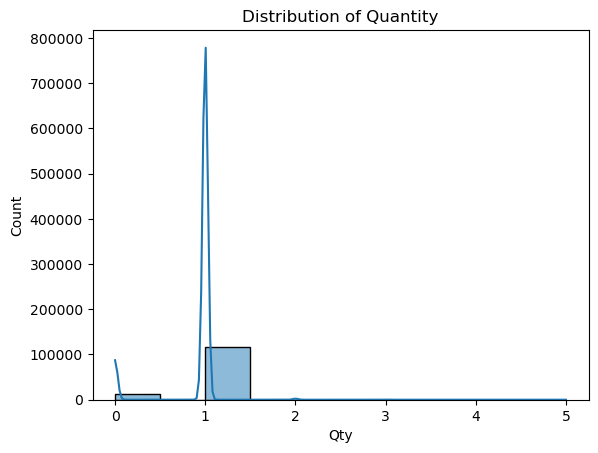

In [75]:
sns.histplot(amazon_df_cleaned['Qty'], bins = 10, kde = True)
plt.title('Distribution of Quantity')
plt.show()

In [77]:
#checking where quantity is 0
amazon_df_cleaned[amazon_df_cleaned['Qty'] == 0]['Status'].value_counts()

Status
Cancelled                       12693
Shipped                            93
Shipped - Delivered to Buyer        8
Shipped - Returned to Seller        3
Pending                             2
Name: count, dtype: int64

In [89]:
#Filtering the data where quantity is 0 and status is cancelled
amazon_df_cleaned = amazon_df_cleaned[~((amazon_df_cleaned['Qty'] == 0 ) & (amazon_df_cleaned['Status'] != 'Cancelled'))]

In [90]:
amazon_df_cleaned[amazon_df_cleaned['Qty'] == 0]['Status'].value_counts()

Status
Cancelled    12693
Name: count, dtype: int64

Handelling the outliers in 'Amount' column

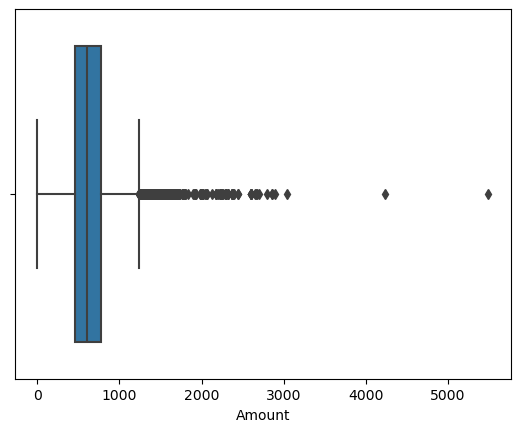

In [93]:
sns.boxplot(x=amazon_df_cleaned['Amount'])
plt.show()

In [102]:
amazon_df_cleaned[amazon_df_cleaned['Amount'] > 4000]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,promotion_flag
11160,403-4106553-1691525,2022-04-23,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0013,J0013-SKD-XXXL,Set,3XL,B08CN3P4HX,Shipped,5,INR,5495.00,JALANDHAR,PUNJAB,144022,IN,Amazon PLCC Free-Financing Universal Merchant ...,True,Known
24494,407-3483041-9133135,2022-04-16,Cancelled,Merchant,Amazon.in,Standard,SET397,SET397-KR-NP -M,Set,M,B09RKD6KWL,Shipped,0,INR,4235.72,Jaipur,RAJASTHAN,302012,IN,Unknown,False,Unknown


In [101]:
amazon_df_cleaned[amazon_df_cleaned['Qty'] == 0]['Amount'].describe()

count    12693.000000
mean       611.583731
std        156.140522
min        218.100000
25%        605.000000
50%        605.000000
75%        605.000000
max       4235.720000
Name: Amount, dtype: float64

In [104]:
amazon_df_cleaned.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
promotion_flag        0
dtype: int64

In [106]:
amazon_df_cleaned.duplicated().sum()

0

In [107]:
#reseting the index
amazon_df_cleaned.reset_index(drop=True, inplace=True)

In [ ]:
amazon_df_cleaned.to_csv('F:\Amazon_Sales_Analysis\data\processsed', index=False)


## 4. Exploratory Data Analysis (EDA)  
- **Descriptive Statistics:**  
  - Mean, median, mode, standard deviation  
- **Data Visualization:**  
  - Sales trends over time  
  - Top-selling products and categories  
  - Order fulfillment comparison  

---


## 5. Key Performance Metrics  
- Total revenue analysis  
- Average order value (AOV)  
- Customer retention rates  
- Fulfillment efficiency (Amazon vs Seller)  

---


## 6. A/B Testing Implementation  
- **Objective:** Evaluate business strategies using A/B testing  
- **Hypothesis Formulation:**  
  - Example: "Offering free shipping will increase sales conversion"  
- **Experiment Design:**  
  - Test groups vs control groups  
  - Metrics to measure success (e.g., revenue, conversion rates)  
- **Analysis & Interpretation:**  
  - Statistical significance evaluation  
  - Business impact assessment  

---


## 7. Insights and Recommendations  
- Findings based on data analysis  
- Suggested improvements in:  
  - Pricing strategies  
  - Inventory management  
  - Fulfillment processes  

---


## 8. Conclusion  
- Summary of key takeaways  
- Future scope of analysis  
- Potential areas of further study (e.g., customer segmentation)  

---

## 10. References & Appendix  
- Data sources  
- Additional resources and tools used 
